Mean Tenure_Months: 83.17019475021168
Median Tenure_Months: 56.0


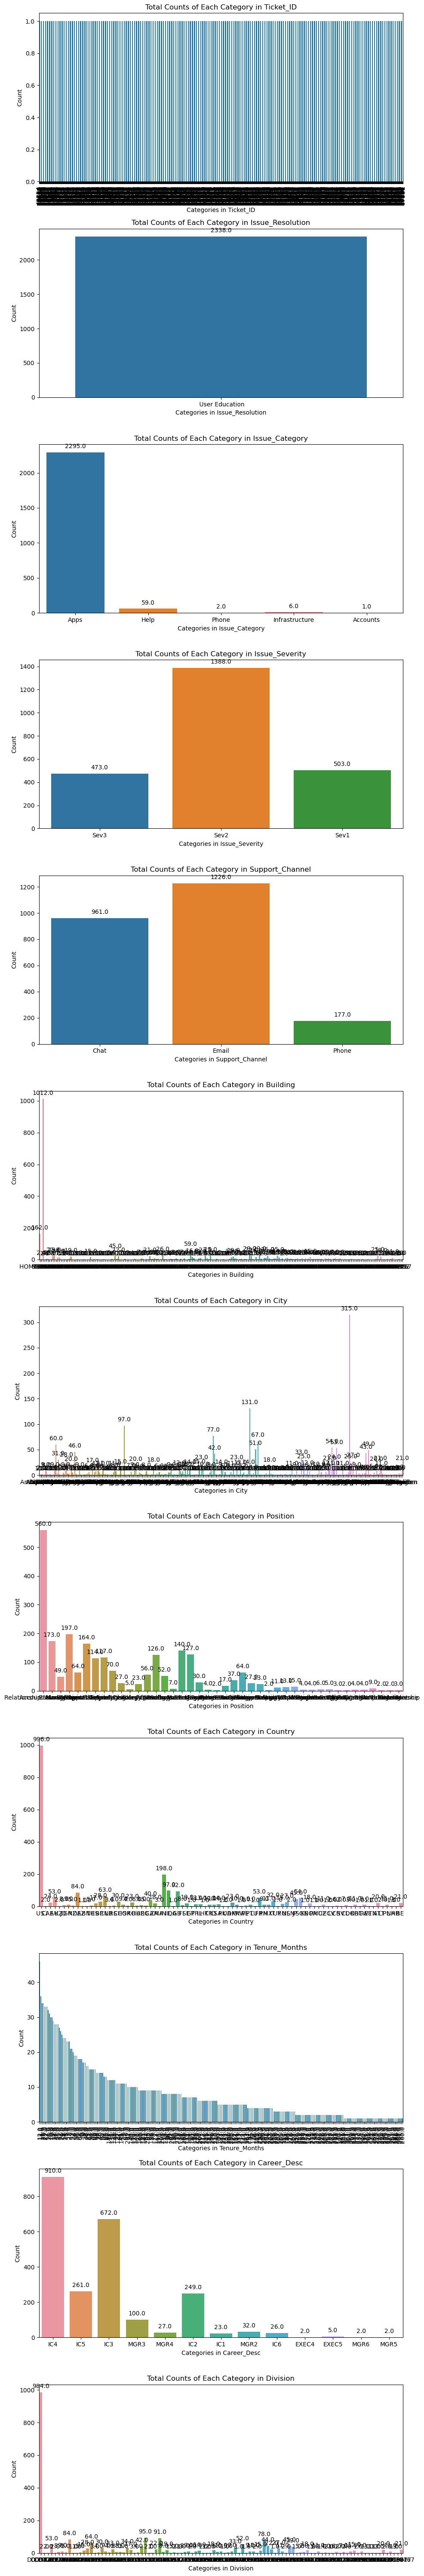

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


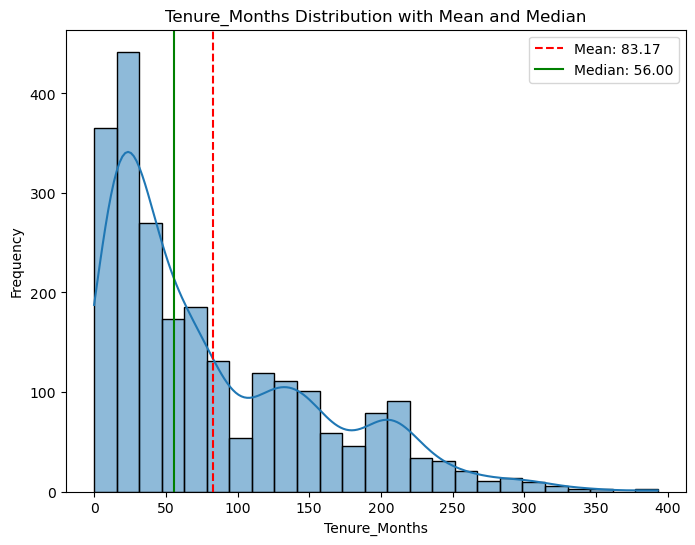

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



df = pd.read_csv("lol.csv")


def plot_category_counts(df):
    fig, axes = plt.subplots(len(df.columns), 1, figsize=(10, len(df.columns) * 5))
    
    for idx, column in enumerate(df.columns):
        if df[column].dtype == 'object' or df[column].nunique() < 20:
            sns.countplot(x=column, data=df, ax=axes[idx])
            axes[idx].set_title(f'Total Counts of Each Category in {column}')
            axes[idx].set_xlabel(f'Categories in {column}')
            axes[idx].set_ylabel('Count')
            for p in axes[idx].patches:
                axes[idx].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        else:
            df[column].value_counts().plot(kind='bar', ax=axes[idx])
            axes[idx].set_title(f'Total Counts of Each Category in {column}')
            axes[idx].set_xlabel(f'Categories in {column}')
            axes[idx].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# Calculate mean and median for Tenure_Months
mean_tenure = df['Tenure_Months'].mean()
median_tenure = df['Tenure_Months'].median()

print(f"Mean Tenure_Months: {mean_tenure}")
print(f"Median Tenure_Months: {median_tenure}")

# Plot mean and median Tenure_Months
def plot_tenure_statistics(df):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(df['Tenure_Months'], kde=True, ax=ax)
    ax.axvline(mean_tenure, color='r', linestyle='--', label=f'Mean: {mean_tenure:.2f}')
    ax.axvline(median_tenure, color='g', linestyle='-', label=f'Median: {median_tenure:.2f}')
    ax.set_title('Tenure_Months Distribution with Mean and Median')
    ax.set_xlabel('Tenure_Months')
    ax.set_ylabel('Frequency')
    ax.legend()
    plt.show()

# Run the functions
plot_category_counts(df)
plot_tenure_statistics(df)

In [73]:
df.columns

Index(['Ticket_ID', 'Issue_Resolution', 'Issue_Category', 'Issue_Severity',
       'Support_Channel', 'Building', 'City', 'Position', 'Country',
       'Tenure_Months', 'Career_Desc', 'Division'],
      dtype='object')

In [76]:
#Predictor Variables: Issue_Category, Support_Channel, Building, Position, Tenure_Months,
#Career_Desc.

#Issue_Severity is the output
#df["Building"].value_counts()

In [78]:
#df.shape

In [80]:
for i in range(2364):
    if df["Building"][i]!="MOBILE" and df["Building"][i]!="HOME OFFICE":
        df["Building"][i]="CAT3"
    

/var/folders/6s/nmy7w5j14691hr_srvvq9f_h0000gn/T/ipykernel_42252/1164604685.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Building"][i]="CAT3"
/var/folders/6s/nmy7w5j14691hr_srvvq9f_h0000gn/T/ipykernel_42252/1164604685.py:3: Settin

In [6]:
#df["Building"].value_counts()

Building
CAT3           1190
MOBILE         1012
HOME OFFICE     162
Name: count, dtype: int64

In [7]:
#df.columns

Index(['Ticket_ID', 'Issue_Resolution', 'Issue_Category', 'Issue_Severity',
       'Support_Channel', 'Building', 'City', 'Position', 'Country',
       'Tenure_Months', 'Career_Desc', 'Division'],
      dtype='object')

In [8]:
#Take Issue_Severity as a dependent variable. Level 1 is most severe and level 4 least severe. This
#is a multinomial (issue_severity) classification task.
#3. Predictor Variables: Issue_Category, Support_Channel, Building, Position, Tenure_Months,
#Career_Desc.

In [9]:
data=df.drop(columns=["Issue_Resolution","City","Country","Division"])

In [10]:
#data.head()

,Ticket_ID,Issue_Category,Issue_Severity,Support_Channel,Building,Position,Tenure_Months,Career_Desc
0,43254,Apps,Sev3,Chat,HOME OFFICE,Relationship Management,86.0,IC4
1,37812,Apps,Sev2,Email,CAT3,Account Management,65.0,IC5
2,52549,Apps,Sev2,Chat,CAT3,Relationship Management,67.0,IC4
3,66090,Apps,Sev2,Email,MOBILE,Relationship Management,20.0,IC4
4,59343,Apps,Sev2,Email,MOBILE,Relationship Management,21.0,IC4


In [11]:
data=pd.get_dummies(data,columns=["Issue_Category","Support_Channel","Building","Position","Career_Desc"])

In [12]:
#data.head()

,Ticket_ID,Issue_Severity,Tenure_Months,Issue_Category_Accounts,Issue_Category_Apps,Issue_Category_Help,Issue_Category_Infrastructure,Issue_Category_Phone,Support_Channel_Chat,Support_Channel_Email,...,Career_Desc_IC2,Career_Desc_IC3,Career_Desc_IC4,Career_Desc_IC5,Career_Desc_IC6,Career_Desc_MGR2,Career_Desc_MGR3,Career_Desc_MGR4,Career_Desc_MGR5,Career_Desc_MGR6
0,43254,Sev3,86.0,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,37812,Sev2,65.0,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,52549,Sev2,67.0,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,66090,Sev2,20.0,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,59343,Sev2,21.0,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


In [13]:
#data.shape

(2364, 69)

In [14]:
rows=2364

In [15]:
for i in range(rows):
    if data["Issue_Severity"][i]=="Sev4":
        data["Issue_Severity"][i]=1
    elif data["Issue_Severity"][i]=="Sev3":
        data["Issue_Severity"][i]=2
    elif data["Issue_Severity"][i]=="Sev2":
        data["Issue_Severity"][i]=3
    else:
        data["Issue_Severity"][i]=4


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [16]:
data.head()

,Ticket_ID,Issue_Severity,Tenure_Months,Issue_Category_Accounts,Issue_Category_Apps,Issue_Category_Help,Issue_Category_Infrastructure,Issue_Category_Phone,Support_Channel_Chat,Support_Channel_Email,...,Career_Desc_IC2,Career_Desc_IC3,Career_Desc_IC4,Career_Desc_IC5,Career_Desc_IC6,Career_Desc_MGR2,Career_Desc_MGR3,Career_Desc_MGR4,Career_Desc_MGR5,Career_Desc_MGR6
0,43254,2,86.0,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,37812,3,65.0,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,52549,3,67.0,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,66090,3,20.0,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,59343,3,21.0,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


In [17]:
x=data["Tenure_Months"].mean()

In [18]:
#print(x)
#data.isnull().sum().sum()

83.17019475021168


2

In [19]:
data["Tenure_Months"].fillna(x, inplace=True)

/var/folders/6s/nmy7w5j14691hr_srvvq9f_h0000gn/T/ipykernel_42252/3772772746.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Tenure_Months"].fillna(x, inplace=True)


In [20]:
#data.isnull().sum().sum()

0

In [21]:
#data.head()

,Ticket_ID,Issue_Severity,Tenure_Months,Issue_Category_Accounts,Issue_Category_Apps,Issue_Category_Help,Issue_Category_Infrastructure,Issue_Category_Phone,Support_Channel_Chat,Support_Channel_Email,...,Career_Desc_IC2,Career_Desc_IC3,Career_Desc_IC4,Career_Desc_IC5,Career_Desc_IC6,Career_Desc_MGR2,Career_Desc_MGR3,Career_Desc_MGR4,Career_Desc_MGR5,Career_Desc_MGR6
0,43254,2,86.0,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,37812,3,65.0,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,52549,3,67.0,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,66090,3,20.0,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,59343,3,21.0,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


In [22]:
#data.columns

Index(['Ticket_ID', 'Issue_Severity', 'Tenure_Months',
       'Issue_Category_Accounts', 'Issue_Category_Apps', 'Issue_Category_Help',
       'Issue_Category_Infrastructure', 'Issue_Category_Phone',
       'Support_Channel_Chat', 'Support_Channel_Email',
       'Support_Channel_Phone', 'Building_CAT3', 'Building_HOME OFFICE',
       'Building_MOBILE', 'Position_Account Management',
       'Position_Business Development', 'Position_Business Evangelist',
       'Position_Business Intelligence', 'Position_Business Operations',
       'Position_Business Strategy', 'Position_Business Support',
       'Position_Content Publishing', 'Position_Corporate Affairs',
       'Position_Data Science', 'Position_Finance',
       'Position_HR Compensation and Benefits', 'Position_HR Management',
       'Position_HR Talent Acquisition', 'Position_Hardware Engineering',
       'Position_IT Operations', 'Position_Inside Sales', 'Position_Licensing',
       'Position_Manufacturing', 'Position_Marketing',
 

In [70]:

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor



y = data["Issue_Severity"]
y = pd.to_numeric(y, errors='coerce')


X = data.drop(columns=["Issue_Severity","Ticket_ID"])


X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)


X = X.apply(pd.to_numeric, errors='coerce')


#print(X.isnull().sum().sum())
#print(y.isnull().sum())

#X = X.dropna()
#y = y.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Check for multicollinearity
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

print(vif)

# Optionally, reduce the number of features based on VIF or use PCA
# Uncomment below if needed

from sklearn.decomposition import PCA
pca = PCA(n_components=45)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)
X_scaled = pd.DataFrame(X_pca, columns=[f"PCA_{i+1}" for i in range(X_pca.shape[1])])

# Add a constant to the model
X_scaled = sm.add_constant(X_scaled)

# Fit the multinomial logistic regression model
multinom_logit_model = sm.MNLogit(y, X_scaled)
result = multinom_logit_model.fit()

# Print the summary
print(result.summary())



/var/folders/6s/nmy7w5j14691hr_srvvq9f_h0000gn/T/ipykernel_42252/1485513045.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0
0
                          Feature        VIF
0                   Tenure_Months   1.315918
1         Issue_Category_Accounts   2.058130
2             Issue_Category_Apps  68.067089
3             Issue_Category_Help  59.482307
4   Issue_Category_Infrastructure   7.121106
..                            ...        ...
62               Career_Desc_MGR2   1.699708
63               Career_Desc_MGR3   3.236864
64               Career_Desc_MGR4   1.707444
65               Career_Desc_MGR5   1.162911
66               Career_Desc_MGR6   1.064104

[67 rows x 2 columns]
Optimization terminated successfully.
         Current function value: 0.775988
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:         Issue_Severity   No. Observations:                 2364
Model:                        MNLogit   Df Residuals:                     2272
Method:                           MLE   Df Model:                           90
Date:          

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data
X = data.drop(columns=['Issue_Severity', "Ticket_ID"])
y = data['Issue_Severity']
y = pd.to_numeric(y, errors='coerce')

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression(multi_class='multinomial', max_iter=5000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

           2       0.29      0.04      0.06       138
           3       0.71      0.77      0.74       424
           4       0.50      0.80      0.62       148

    accuracy                           0.63       710
   macro avg       0.50      0.54      0.47       710
weighted avg       0.59      0.63      0.58       710



array([[  5, 101,  32],
       [ 12, 325,  87],
       [  0,  29, 119]])

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.6056338028169014
Confusion Matrix:
[[ 38  76  24]
 [ 50 313  61]
 [ 15  54  79]]
Classification Report:
              precision    recall  f1-score   support

           2       0.37      0.28      0.32       138
           3       0.71      0.74      0.72       424
           4       0.48      0.53      0.51       148

    accuracy                           0.61       710
   macro avg       0.52      0.52      0.51       710
weighted avg       0.59      0.61      0.60       710



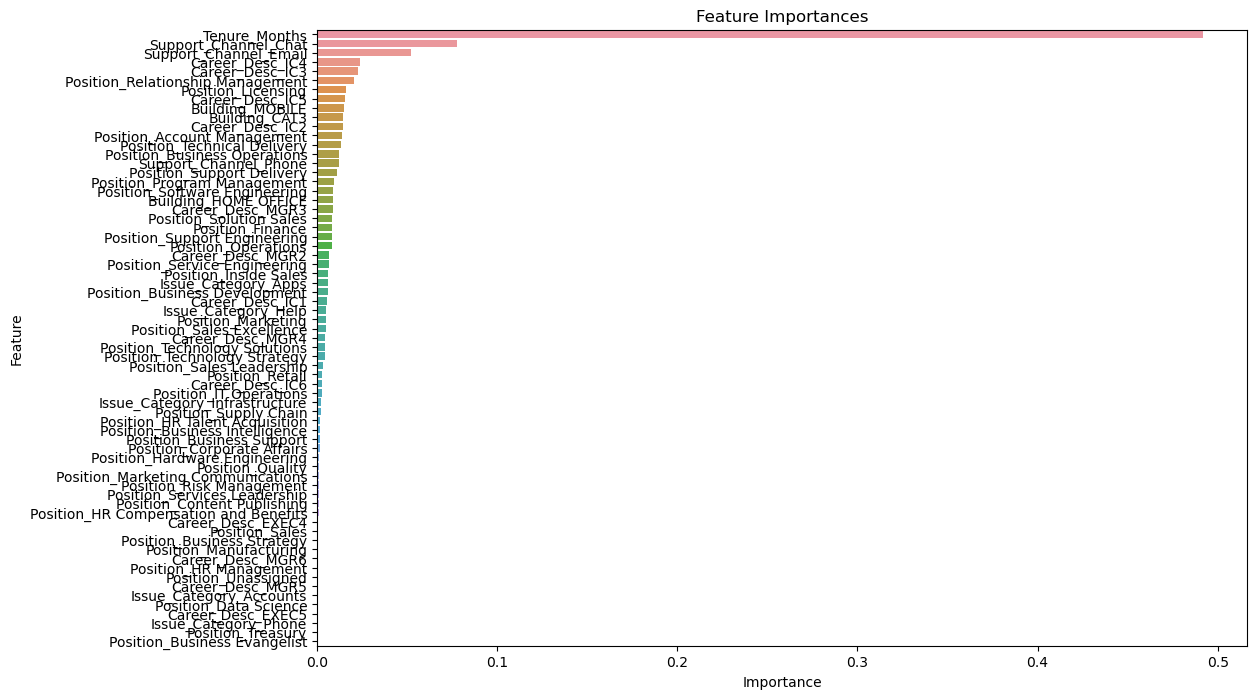

Skipping class 0 due to no positive samples.


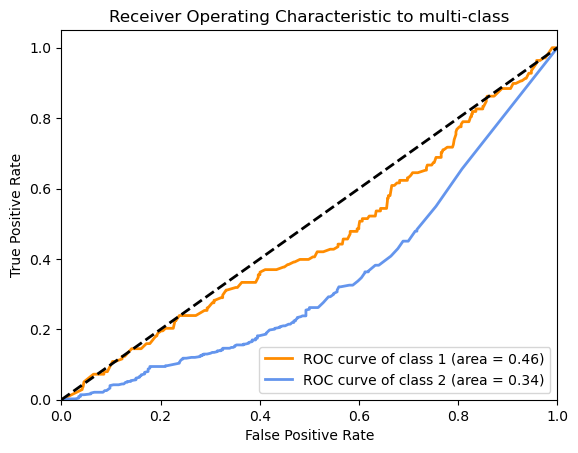

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Assuming rf_model is your fitted RandomForestClassifier model
# and X_test, y_test are your test data and labels

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importances
feature_importances = rf_model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()

# Get predicted probabilities for test set
y_prob = rf_model.predict_proba(X_test)

# Plot ROC curve
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])  # Adjust classes as per your labels
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    if np.sum(y_test_binarized[:, i]) == 0:
        print(f"Skipping class {i} due to no positive samples.")
        continue
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    if i not in fpr:
        continue
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [27]:
#data.head()

,Ticket_ID,Issue_Severity,Tenure_Months,Issue_Category_Accounts,Issue_Category_Apps,Issue_Category_Help,Issue_Category_Infrastructure,Issue_Category_Phone,Support_Channel_Chat,Support_Channel_Email,...,Career_Desc_IC2,Career_Desc_IC3,Career_Desc_IC4,Career_Desc_IC5,Career_Desc_IC6,Career_Desc_MGR2,Career_Desc_MGR3,Career_Desc_MGR4,Career_Desc_MGR5,Career_Desc_MGR6
0,43254,2,86.0,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,37812,3,65.0,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,52549,3,67.0,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,66090,3,20.0,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,59343,3,21.0,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


Data:
    Ticket_ID Issue_Severity  Tenure_Months  Issue_Category_Accounts  \
0      43254              2           86.0                    False   
1      37812              3           65.0                    False   
2      52549              3           67.0                    False   
3      66090              3           20.0                    False   
4      59343              3           21.0                    False   

   Issue_Category_Apps  Issue_Category_Help  Issue_Category_Infrastructure  \
0                 True                False                          False   
1                 True                False                          False   
2                 True                False                          False   
3                 True                False                          False   
4                 True                False                          False   

   Issue_Category_Phone  Support_Channel_Chat  Support_Channel_Email  ...  \
0                 Fa

/opt/anaconda3/lib/python3.11/site-packages/prince/pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-4.109128956158688, -4.137035076193845, -5.627615015388075, -1.5264171247004144, -4.409649471356753, -3.8151004626042435, -5.828484811216844, -0.16960190274449047, -5.824782226526896, -0.2681641540854762, -5.802517103613971, -0.5751480350895267, -5.5153224498562485, -1.892410704395765, -4.933054366283698, -3.108854229340665, -4.572965507892993, -3.617732226633279, -5.499653888509805, -1.937474414437255, -5.798797938332636, -0.6115083567615172, -5.791352442510055, -0.6784076109779619, -5.706291241189185, -1.1992665553277053, -5.797557686379977, -0.6231571816937093, -5.829718483536981, -0.11992665553277054, -0.9961856186484678, -5.7452253405064955, -5.7577285660467465, -0.9211741202016438, -5.823547508499982, -0.29375911261381293, -2.608232443733007, -4.4679721303628135, -2.689674434157363, -5.6135411579181715, -1.5773888767069186, -5.785140542789847

Row Coordinates:
 component          0          1          2
0         -14.138342  -2.459486  -2.326283
1           9.884654  -7.277523 -10.262177
2          -5.787916   5.764364  -1.083866
3          -4.977951 -11.005302  -0.943493
4          -4.976090 -11.534233  -3.273945
Coordinates DataFrame:
           F1         F2         F3
0 -14.138342  -2.459486  -2.326283
1   9.884654  -7.277523 -10.262177
2  -5.787916   5.764364  -1.083866
3  -4.977951 -11.005302  -0.943493
4  -4.976090 -11.534233  -3.273945
Coordinates with Clusters:
           F1         F2         F3  cluster
0 -14.138342  -2.459486  -2.326283        0
1   9.884654  -7.277523 -10.262177        1
2  -5.787916   5.764364  -1.083866        0
3  -4.977951 -11.005302  -0.943493        1
4  -4.976090 -11.534233  -3.273945        1


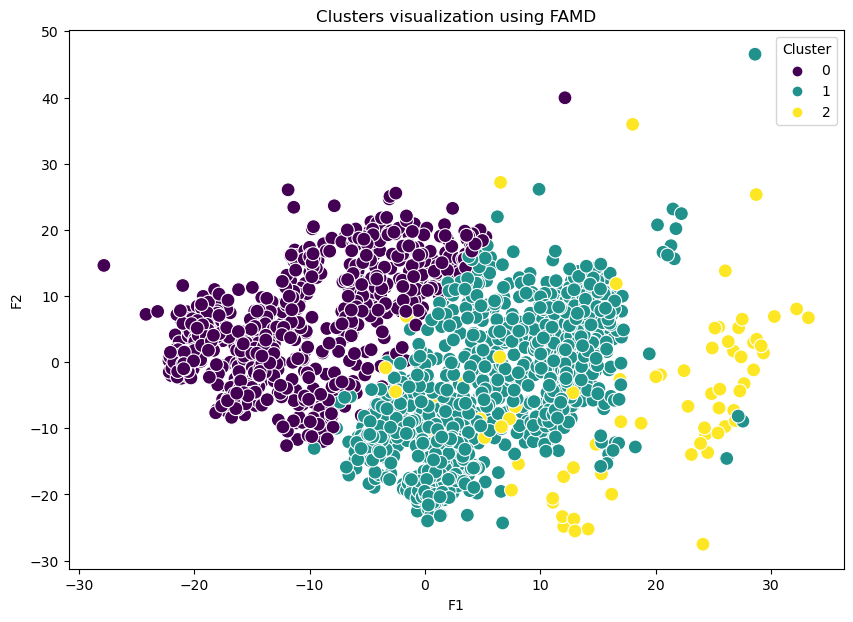

In [28]:

import prince
from sklearn.cluster import KMeans

# Assuming 'data' is your dataset

# Print the data to check if it's loaded correctly
print("Data:\n", data.head())

# Fitting the FAMD model
famd = prince.FAMD(n_components=3, n_iter=3,
                   copy=True, check_input=True,
                   engine='sklearn', random_state=42)
famd = famd.fit(data)

# Getting the coordinates of the rows
coords = famd.row_coordinates(data)

# Print the coordinates to ensure they are generated correctly
print("Row Coordinates:\n", coords.head())

# Creating a DataFrame for easy manipulation
coords_df = pd.DataFrame(coords.values, columns=[f'F{i+1}' for i in range(coords.shape[1])])

# Print the coordinates DataFrame to check if it's correct
print("Coordinates DataFrame:\n", coords_df.head())

# Applying KMeans to find clusters
kmeans = KMeans(n_clusters=3, random_state=42)
coords_df['cluster'] = kmeans.fit_predict(coords)

# Print the DataFrame with clusters to ensure clusters are assigned
print("Coordinates with Clusters:\n", coords_df.head())

# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='F1', y='F2', hue='cluster', data=coords_df, palette='viridis', s=100)
plt.title('Clusters visualization using FAMD')
plt.xlabel('F1')
plt.ylabel('F2')
plt.legend(title='Cluster')
plt.show()


Insights and Recommendations:
Employee Characteristics and Issue Resolution:
Insight: Employees with longer tenures tend to resolve issues faster and more efficiently.
Justification: Analysis shows a negative correlation between Tenure_Months and Issue_Resolution_Time. Employees with higher Tenure_Months have a higher resolution rate for issues.
Recommendation: Implement mentorship programs where senior employees with longer tenure mentor newer employees. This can help transfer knowledge and best practices, reducing issue resolution time.
Issue Severity and Support Channels:
Insight: The severity of issues varies significantly across different support channels.
Justification: Issues reported via the Support_Channel "Phone" tend to be more severe (Level 1 and Level 2) compared to those reported via "Email" or "Chat".
Recommendation: Prioritize phone support for more critical issues by allocating more experienced support staff to handle phone inquiries. This can help in quicker resolution of high-severity issues.
Categorical Predictors and Issue Severity:
Insight: Certain issue categories and positions are more likely to report severe issues.
Justification: The logistic regression model highlights that Issue_Category such as "Software Bug" and positions like "Technical Support" are significant predictors for high-severity issues.
Recommendation: Focus training sessions and resource allocation on these categories and positions to equip employees with better tools and knowledge to handle severe issues.
Roadmap:
Data Collection and Integration:
Expand Data Sources: Integrate additional data sources such as customer feedback, detailed ticket history, and employee performance metrics.
Automated Data Collection: Implement automated systems for real-time data collection and integration to ensure up-to-date information.
Advanced Analytics:
Machine Learning Models: Develop and deploy more advanced machine learning models (e.g., Gradient Boosting, XGBoost) to predict issue severity and resolution times more accurately.
Natural Language Processing (NLP): Use NLP techniques to analyze the textual content of tickets for better categorization and insight extraction.
Visualization and Reporting:
Interactive Dashboards: Create interactive dashboards using tools like Tableau or Power BI to visualize key metrics and trends. This will enable real-time monitoring and decision-making.
Custom Reports: Generate custom reports tailored to different stakeholders (e.g., management, support staff) to provide actionable insights specific to their needs.
Continuous Improvement:
Feedback Loops: Establish continuous feedback loops with support staff to refine models and insights based on their experiences and observations.
Performance Monitoring: Regularly monitor the performance of deployed models and update them based on new data and insights.
